## Инициализация проекта

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings


# Исследование данных

### Вывод базовой информации

In [220]:
data = pd.read_csv('../data/trip_duration_task.csv')

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 729322 non-null  object 
 1   vendor_id          727135 non-null  float64
 2   pickup_datetime    729322 non-null  object 
 3   dropoff_datetime   729322 non-null  object 
 4   passenger_count    729322 non-null  int64  
 5   pickup_longitude   729322 non-null  float64
 6   pickup_latitude    727475 non-null  float64
 7   dropoff_longitude  729322 non-null  float64
 8   dropoff_latitude   729322 non-null  float64
 9   trip_duration      729322 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 55.6+ MB


In [222]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id1080784,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,id0889885,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,id0857912,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,id3744273,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,id0232939,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848


In [223]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,727135.000000,729322.000000,729322.000000,727475.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535377,1.662055,-73.973513,40.750917,-73.973422,40.751775,9.522291e+02
std,0.498747,1.312446,0.069754,0.033608,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737331,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754066,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768311,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


### Обработка пропусков

Выведем в % кол-во пропусков в каждом столбце:

In [224]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

vendor_id            0.299868
pickup_latitude      0.253249
id                   0.000000
pickup_datetime      0.000000
passenger_count      0.000000
dropoff_datetime     0.000000
pickup_longitude     0.000000
dropoff_longitude    0.000000
dropoff_latitude     0.000000
trip_duration        0.000000
dtype: float64

Максимальное кол-во пропусков на столбец не превышает 0.3%, поэтому можно удалить строки, в которых встречаются пропуски.

In [225]:
data.dropna(inplace=True)
data.isna().sum()

id                   0
vendor_id            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_duration        0
dtype: int64

### Обработка выбросов и аномалий

In [ ]:
data.drop_duplicates(inplace=True)
int(data.duplicated().sum())

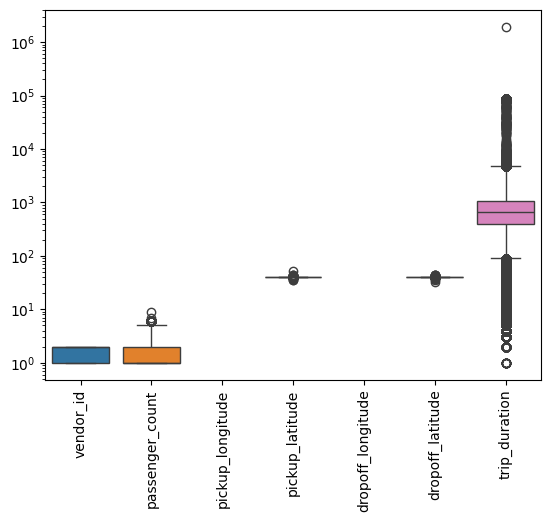

In [226]:
sns.boxplot(data, log_scale=True)
plt.xticks(rotation=90)
plt.show()

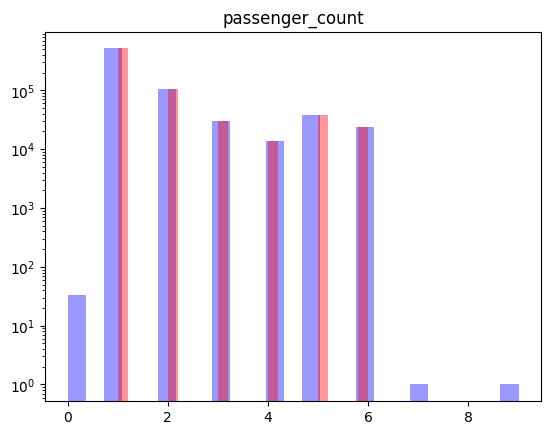

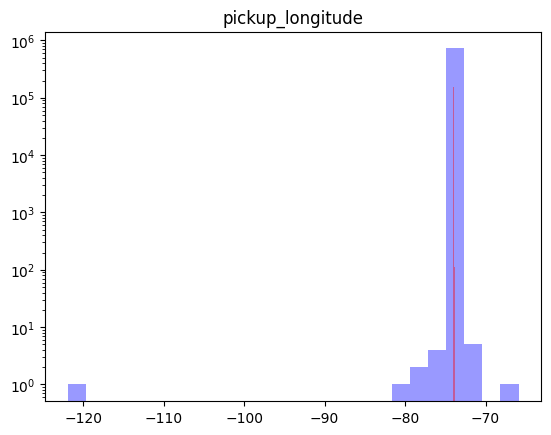

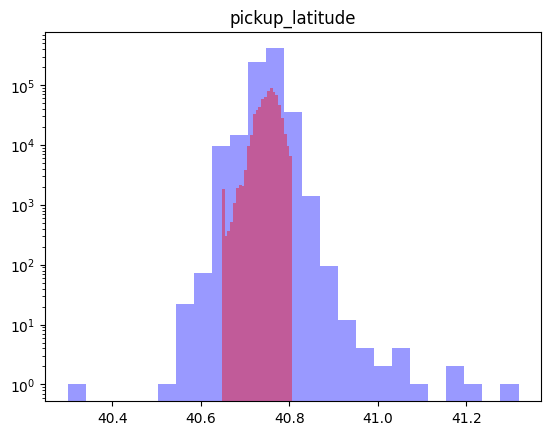

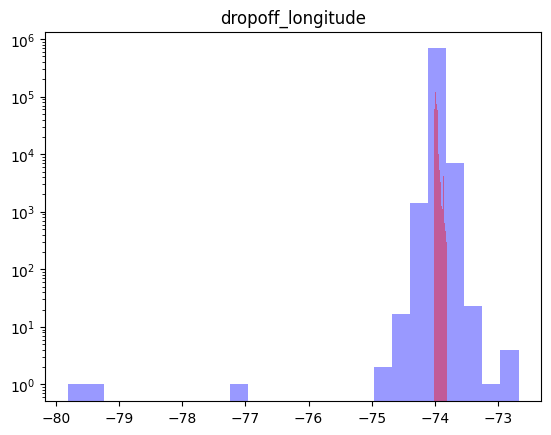

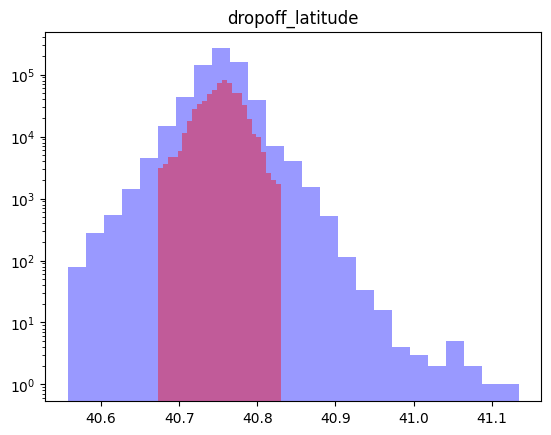

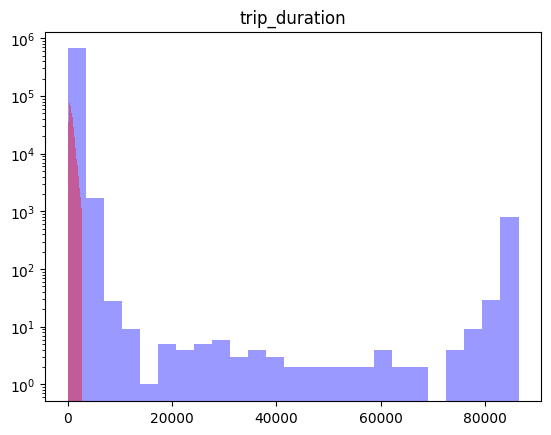

In [227]:
for column in data.columns:
    if column not in ['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime']:
        plt.hist(data[column], bins=25, log=True,color='blue', alpha=0.4)
        lower_bound = data[column].quantile(0.01)
        upper_bound = data[column].quantile(0.99)

        data = data[data[column] >= lower_bound]
        data = data[data[column] <= upper_bound]
        plt.hist(data[column], bins=25, log=True,color='red', alpha=0.4)
        plt.title(column)
        plt.show()

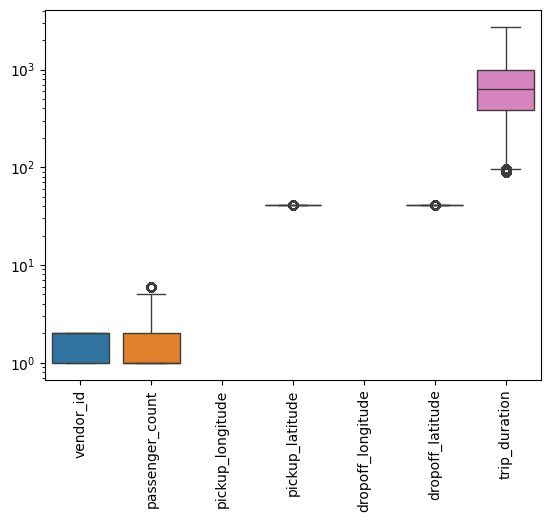

In [228]:
sns.boxplot(data, log_scale=True)
plt.xticks(rotation=90)
plt.show()

In [229]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000,655757.00000
mean,1.534347,1.659796,-73.977879,40.753132,-73.976145,40.753414,748.81871
std,0.498819,1.311869,0.024935,0.021905,0.024742,0.024999,480.98964
min,1.000000,1.000000,-74.014343,40.647179,-74.015038,40.672672,90.00000
25%,1.000000,1.000000,-73.991837,40.739460,-73.991287,40.738506,389.00000
50%,2.000000,1.000000,-73.982071,40.754902,-73.980247,40.755180,632.00000
75%,2.000000,2.000000,-73.969208,40.768250,-73.965401,40.769531,989.00000
max,2.000000,6.000000,-73.782516,40.806633,-73.809151,40.830524,2743.00000


### Обработка столбцов

Исходный датасет содержит столбцы, которые не содержат информации, имеющей свзять с продолжительностью поездки: id.

In [230]:
data.drop(columns=['id'], inplace=True)
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
5,2.0,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,1455


# Обогощение данных

### Исключительный случай

Датасет содержит столбец, содержащий информацию о времени начала поездки, что вплоне логично для задачи расчета продолжительности поездки, а также содержит столбец времени окончания поездки, что нелогично для данной задачи. Поэтому я решил удалить столбец времени окончания поездки, чтобы симулировать настояющую бизнес-задачу.

In [231]:
data.drop(columns=['dropoff_datetime'], inplace=True)
data.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2.0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400
1,1.0,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,2.0,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,2.0,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141
5,2.0,2016-02-14 18:31:42,2,-73.993614,40.751884,-73.995422,40.723862,1455


Поскольку мой датасет содержит координаты поездок, я решил вывести некоторую выборку из них на карту, чтобы посмотреть как они распределены.

In [232]:
import folium
from shapely.geometry import Point, Polygon

data_sample = data.sample(frac=0.001) # 0.1%

m = folium.Map(location=[data_sample.iloc[0]['pickup_latitude'], data_sample.iloc[0]['pickup_longitude']], zoom_start=11.5)

nyc_center_polygon =  Polygon([
    (-73.955539, 40.829344),
    (-74.011861, 40.752701),
    (-74.01954326467963, 40.71452872820932),
    (-74.0153570038084, 40.69996899434237),
    (-73.9774198401262, 40.71129042453187),
    (-73.9717550144014, 40.72885435095875),
    (-73.94296996632072, 40.7761792515498),
    (-73.92970080603428, 40.801063436793875)
])

folium.Polygon(locations=[(y, x) for x, y in nyc_center_polygon.exterior.coords], 
               color="red", fill=True, fill_opacity=0.3, popup="NYC center").add_to(m)

for _, row in data_sample.iterrows():
    folium.Marker([row['pickup_latitude'], row['pickup_longitude']]).add_to(m)

for _, row in data_sample.iterrows():
    folium.Marker([row['dropoff_latitude'], row['dropoff_longitude']]).add_to(m)

m.save('../images/map.html')


### Анализ карты

Большая часть поездок распределена в центре города, также есть заметные скопления вокруг аэропортов, остальная часть равномерно распределена по городским окраинам. Я хотел проверить, есть ли в моих данных разбиение на городские/междугородние поездки. Такое разбиение не выявлено, но я заметил, что поездки делятся в основном на 2 типа: по центральной части Нью-Йорка (кварталы с небоскребами и многоэтажными домами), по удаленной части города (районы с мало-этажными строениями). Возможно, во второй части города трафик в среднем будет меньше, в связи с этим может иметь место присвоение каждой записи категориального признака принадлжености к одному из типов центр/окраина.

In [233]:

data['pickup_point'] = data.apply(lambda row: Point(row['pickup_longitude'], row['pickup_latitude']), axis=1)
data['dropoff_point'] = data.apply(lambda row: Point(row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

data['pickup_in_zone'] = data['pickup_point'].apply(lambda p: nyc_center_polygon.contains(p))
data['dropoff_in_zone'] = data['dropoff_point'].apply(lambda p: nyc_center_polygon.contains(p))

data['in_nyc_center?'] = data.apply(lambda row: 1 if row['pickup_in_zone'] or row['dropoff_in_zone'] else 0, axis=1)

data.drop(columns=['pickup_point', 'dropoff_point', 'pickup_in_zone', 'dropoff_in_zone'], inplace=True)

data.head(10)


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,in_nyc_center?
0,2.0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,1
1,1.0,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,1
2,2.0,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,1
3,2.0,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,1
5,2.0,2016-02-14 18:31:42,2,-73.993614,40.751884,-73.995422,40.723862,1455,1
6,1.0,2016-04-20 20:30:14,1,-73.965080,40.758915,-73.976807,40.764107,397,1
7,2.0,2016-06-19 16:48:14,1,-73.963890,40.765434,-73.872429,40.774200,1101,1
8,2.0,2016-03-28 19:17:03,2,-73.872887,40.774281,-73.979019,40.761879,1886,1
9,1.0,2016-04-10 22:01:41,1,-73.987823,40.740982,-73.999153,40.686451,1429,1
10,1.0,2016-01-17 19:40:26,1,-73.997116,40.722099,-74.006897,40.708321,527,1


### Извлечение дистанции поездки

Координаты, конечно, являются цифрами, но по ним сложнее выявить закономерности и обучить модель, так как для анализа расстояния между точкой посадки и высадки нужно проанализировать 4 переменные. Выделение из координат дистанции и ее последующий анализ будут понятнее и менее затратны.

In [234]:
from geopy.distance import geodesic

data['distance'] = data.apply(
    lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']),
                          (row['dropoff_latitude'], row['dropoff_longitude'])).meters, axis=1
)
data.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,in_nyc_center?,distance
0,2.0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,1,1199.769914
1,1.0,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,1,4123.945168
2,2.0,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,1,7250.435807
3,2.0,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,2358.286547
5,2.0,2016-02-14 18:31:42,2,-73.993614,40.751884,-73.995422,40.723862,1455,1,3115.641570


### Перекодирование pickup_datetime

In [235]:
import category_encoders as ce
data['hour'] = pd.to_datetime(data['pickup_datetime']).dt.hour
data['is_it_weekday?'] = pd.to_datetime(data['pickup_datetime']).dt.dayofweek < 5
data['is_it_weekday?'] = data['is_it_weekday?'].astype(int)
data.head()


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,in_nyc_center?,distance,hour,is_it_weekday?
0,2.0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,1,1199.769914,16,1
1,1.0,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,1,4123.945168,23,1
2,2.0,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,1,7250.435807,17,0
3,2.0,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,2358.286547,9,1
5,2.0,2016-02-14 18:31:42,2,-73.993614,40.751884,-73.995422,40.723862,1455,1,3115.641570,18,0


In [236]:
encoder = ce.OneHotEncoder(cols=['hour'])
data = encoder.fit_transform(data)
data.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,in_nyc_center?,distance,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,is_it_weekday?
0,2.0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,1,1199.769914,...,0,0,0,0,0,0,0,0,0,1
1,1.0,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,1,4123.945168,...,0,0,0,0,0,0,0,0,0,1
2,2.0,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,1,7250.435807,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,2358.286547,...,0,0,0,0,0,0,0,0,0,1
5,2.0,2016-02-14 18:31:42,2,-73.993614,40.751884,-73.995422,40.723862,1455,1,3115.641570,...,0,0,0,0,0,0,0,0,0,0


### Перекодирование vendor_id

In [237]:
data['is_it_first_vendor?(else 2nd)'] = data.apply(lambda row: 1 if row['vendor_id'] == 1.0 else 0, axis=1)
data.drop(columns=['vendor_id'], inplace=True)
data.head()

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,in_nyc_center?,distance,hour_1,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,is_it_weekday?,is_it_first_vendor?(else 2nd)
0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,1,1199.769914,1,...,0,0,0,0,0,0,0,0,1,0
1,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,1,4123.945168,0,...,0,0,0,0,0,0,0,0,1,1
2,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,1,7250.435807,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,2358.286547,0,...,0,0,0,0,0,0,0,0,1,0
5,2016-02-14 18:31:42,2,-73.993614,40.751884,-73.995422,40.723862,1455,1,3115.641570,0,...,0,0,0,0,0,0,0,0,0,0


# Выявление закономерностей в данных

In [238]:
data.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,in_nyc_center?,distance,hour_1,hour_2,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,is_it_weekday?,is_it_first_vendor?(else 2nd)
count,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000,655757.00000,655757.000000,655757.000000,655757.000000,655757.000000,...,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000
mean,1.659796,-73.977879,40.753132,-73.976145,40.753414,748.81871,0.974966,2736.724856,0.043425,0.047594,...,0.049974,0.045831,0.035615,0.021892,0.018826,0.009943,0.009150,0.025833,0.715120,0.465653
std,1.311869,0.024935,0.021905,0.024742,0.024999,480.98964,0.156227,2351.808958,0.203811,0.212905,...,0.217892,0.209119,0.185329,0.146332,0.135909,0.099216,0.095216,0.158636,0.451358,0.498819
min,1.000000,-74.014343,40.647179,-74.015038,40.672672,90.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-73.991837,40.739460,-73.991287,40.738506,389.00000,1.000000,1211.535125,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-73.982071,40.754902,-73.980247,40.755180,632.00000,1.000000,1979.724133,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,-73.969208,40.768250,-73.965401,40.769531,989.00000,1.000000,3389.948141,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6.000000,-73.782516,40.806633,-73.809151,40.830524,2743.00000,1.000000,23900.320397,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Рассмотрим зависимости между временем дня (по часам) и количеством и продолжительностью поездки:

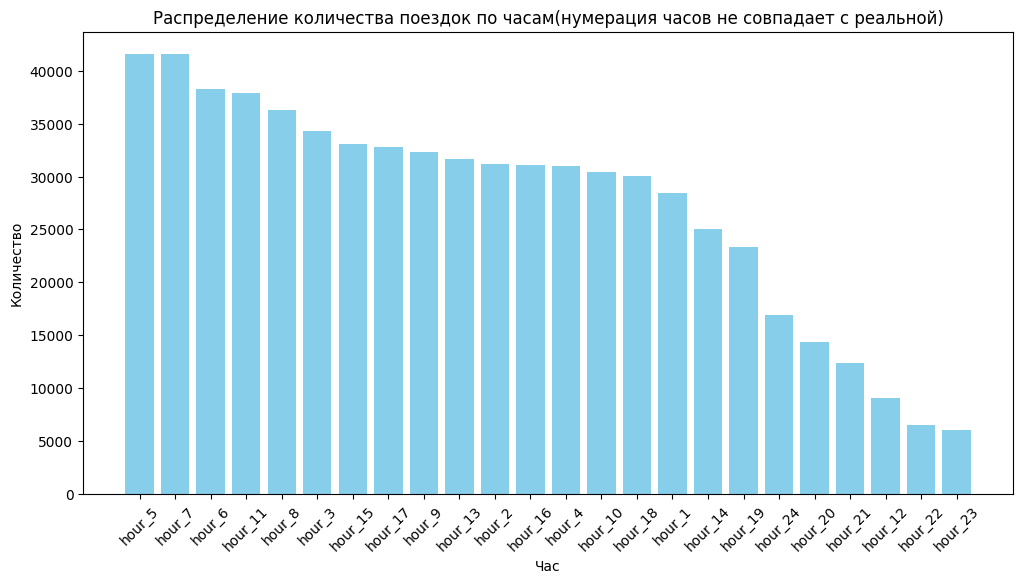

In [239]:
hourly_counts = data[['hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 
                      'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
                      'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'hour_24']].sum()

hourly_counts = hourly_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue')
plt.xlabel('Час')
plt.ylabel('Количество')
plt.title('Распределение количества поездок по часам(нумерация часов не совпадает с реальной)')
plt.xticks(rotation=45)
plt.show()

Наблюдается явная зависимость между часом и количеством поездок.

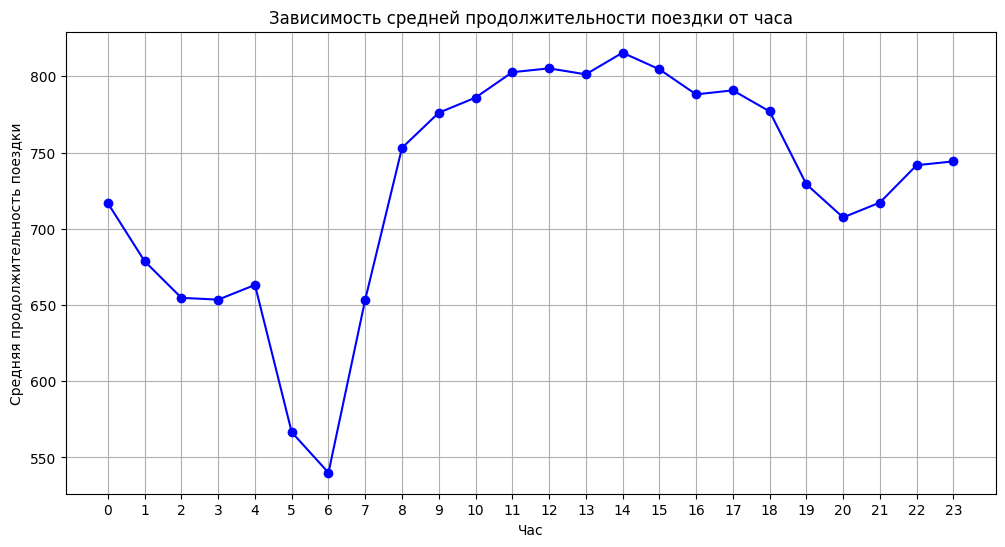

In [ ]:

data['hour'] = pd.to_datetime(data['pickup_datetime']).dt.hour

hourly_trip_duration = data.groupby('hour')['trip_duration'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_trip_duration.index, hourly_trip_duration.values, marker='o', linestyle='-', color='b')
plt.xlabel('Час')
plt.ylabel('Средняя продолжительность поездки')
plt.title('Зависимость средней продолжительности поездки от часа')
plt.xticks(range(24))
plt.grid(True)
plt.show()


Явно видна зависимость между средней продолжительностью поездки и часом.

### Рассмотрим зависимость между расстоянием и длительностью поездки

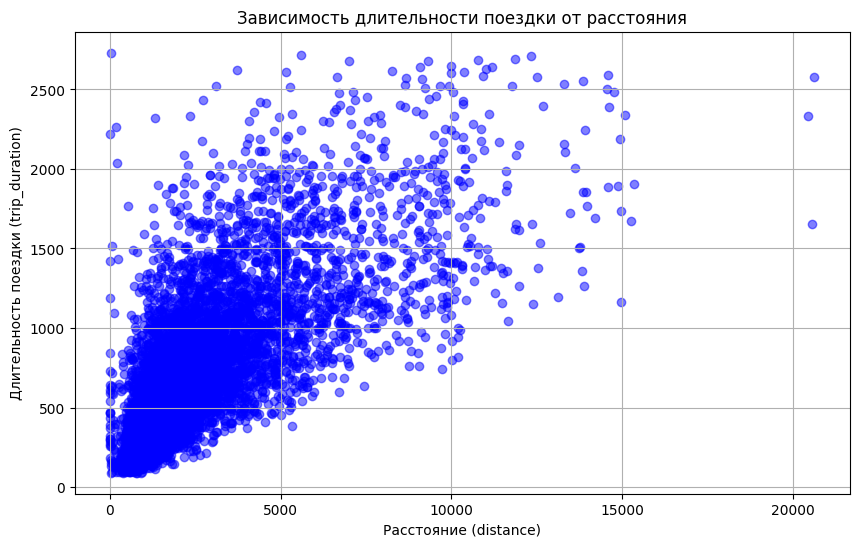

In [241]:
data_sample = data_sample = data.sample(frac=0.01)

plt.figure(figsize=(10, 6))
plt.scatter(data_sample['distance'], data_sample['trip_duration'], alpha=0.5, color='blue')
plt.xlabel('Расстояние (distance)')
plt.ylabel('Длительность поездки (trip_duration)')
plt.title('Зависимость длительности поездки от расстояния')
plt.grid(True)
plt.show()

Очевидно, что с увеличением длительности поездки увеличивается и ее продолжительность. Попытаемся апроксимировать график этой зависимости с помощью графика линейной регрессиии sns.regplot:

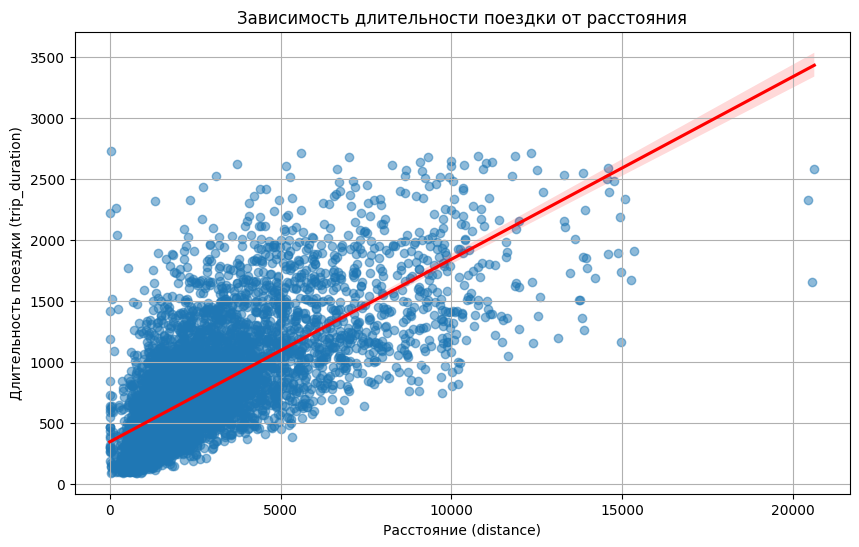

In [242]:
plt.figure(figsize=(10, 6))
sns.regplot(x=data_sample['distance'], y=data_sample['trip_duration'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Расстояние (distance)')
plt.ylabel('Длительность поездки (trip_duration)')
plt.title('Зависимость длительности поездки от расстояния')
plt.grid(True)
plt.show()


### Проверим влияет ли кол-во пассажиров на продолжительность поездки

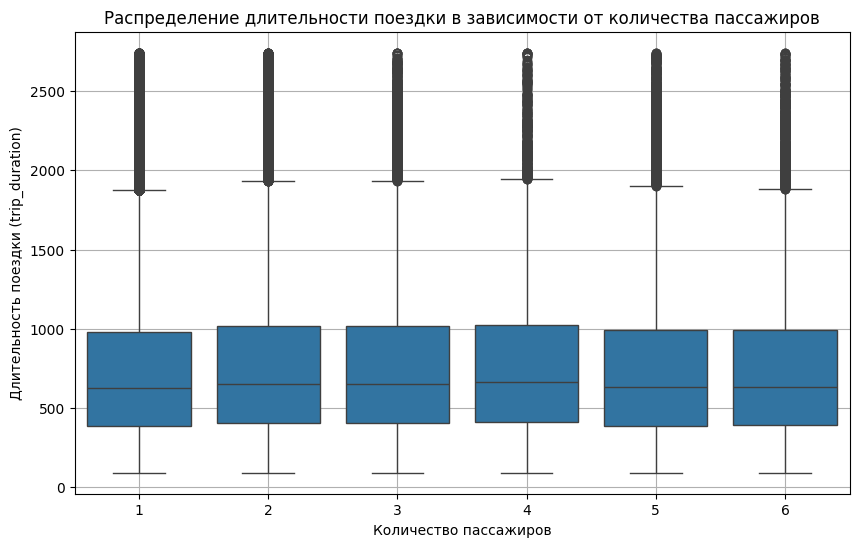

In [243]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['passenger_count'], y=data['trip_duration'])
plt.xlabel('Количество пассажиров')
plt.ylabel('Длительность поездки (trip_duration)')
plt.title('Распределение длительности поездки в зависимости от количества пассажиров')
plt.grid(True)
plt.show()

Очевидно, что влияние кол-ва пассажиров на длительность поездки минимально или отсутствует.

### Проверим влияние бинарных категориальных признаков на целевую переменную

Рассмотрим: 
1. Находится ли точка посадки или высадки в центре города
2. Выполняет ли поездку первый или второй перевозчик
3. Сегодня будний день или выходной

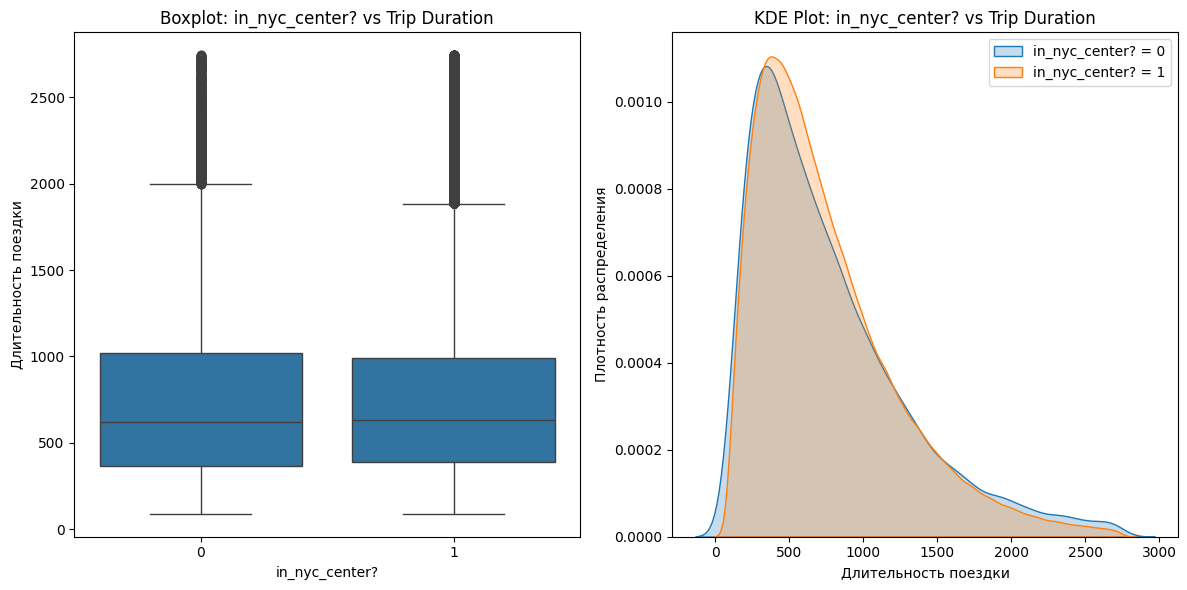

In [244]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=data['in_nyc_center?'], y=data['trip_duration'], ax=axes[0])
axes[0].set_title('Boxplot: in_nyc_center? vs Trip Duration')
axes[0].set_xlabel('in_nyc_center?')
axes[0].set_ylabel('Длительность поездки')

sns.kdeplot(data[data['in_nyc_center?'] == 0]['trip_duration'], label='in_nyc_center? = 0', fill=True, ax=axes[1])
sns.kdeplot(data[data['in_nyc_center?'] == 1]['trip_duration'], label='in_nyc_center? = 1', fill=True, ax=axes[1])
axes[1].set_title('KDE Plot: in_nyc_center? vs Trip Duration')
axes[1].set_xlabel('Длительность поездки')
axes[1].set_ylabel('Плотность распределения')
axes[1].legend()

plt.tight_layout()  
plt.show()

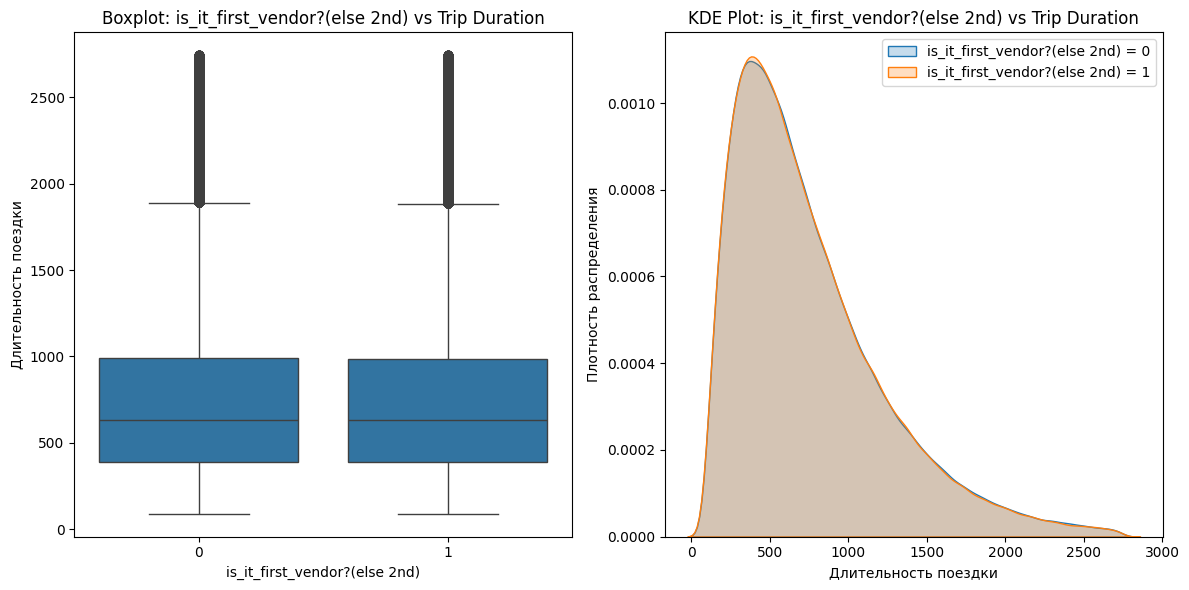

In [245]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=data['is_it_first_vendor?(else 2nd)'], y=data['trip_duration'], ax=axes[0])
axes[0].set_title('Boxplot: is_it_first_vendor?(else 2nd) vs Trip Duration')
axes[0].set_xlabel('is_it_first_vendor?(else 2nd)')
axes[0].set_ylabel('Длительность поездки')

sns.kdeplot(data[data['is_it_first_vendor?(else 2nd)'] == 0]['trip_duration'], label='is_it_first_vendor?(else 2nd) = 0', fill=True, ax=axes[1])
sns.kdeplot(data[data['is_it_first_vendor?(else 2nd)'] == 1]['trip_duration'], label='is_it_first_vendor?(else 2nd) = 1', fill=True, ax=axes[1])
axes[1].set_title('KDE Plot: is_it_first_vendor?(else 2nd) vs Trip Duration')
axes[1].set_xlabel('Длительность поездки')
axes[1].set_ylabel('Плотность распределения')
axes[1].legend()

plt.tight_layout()  
plt.show()

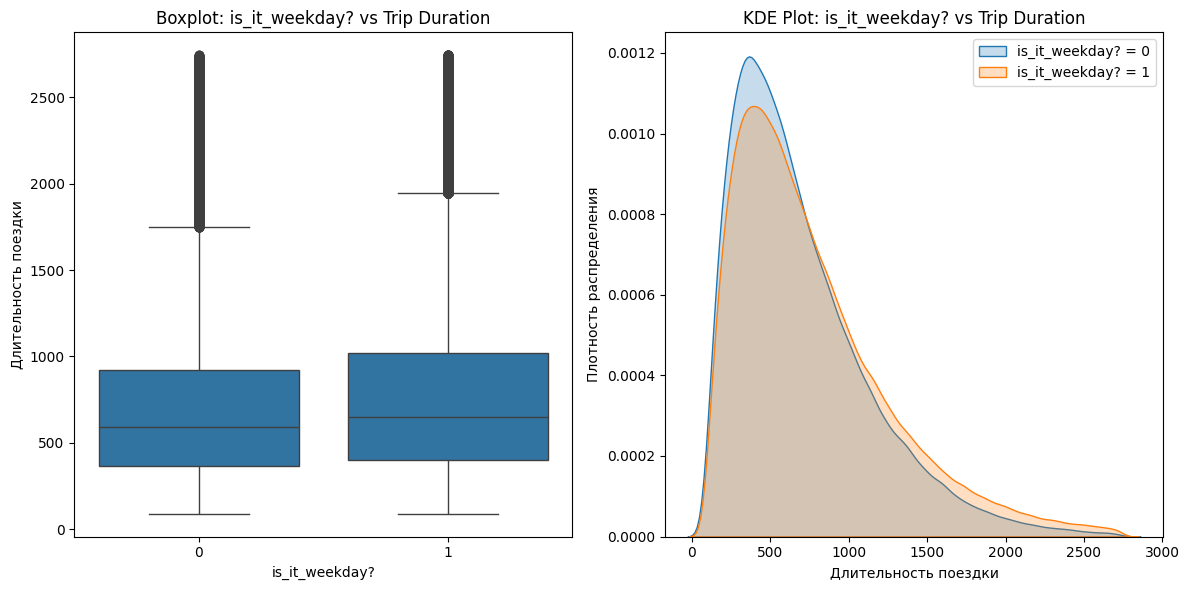

In [246]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=data['is_it_weekday?'], y=data['trip_duration'], ax=axes[0])
axes[0].set_title('Boxplot: is_it_weekday? vs Trip Duration')
axes[0].set_xlabel('is_it_weekday?')
axes[0].set_ylabel('Длительность поездки')

sns.kdeplot(data[data['is_it_weekday?'] == 0]['trip_duration'], label='is_it_weekday? = 0', fill=True, ax=axes[1])
sns.kdeplot(data[data['is_it_weekday?'] == 1]['trip_duration'], label='is_it_weekday? = 1', fill=True, ax=axes[1])
axes[1].set_title('KDE Plot: is_it_weekday? vs Trip Duration')
axes[1].set_xlabel('Длительность поездки')
axes[1].set_ylabel('Плотность распределения')
axes[1].legend()

plt.tight_layout()  
plt.show()

Можно заметить, что немного влияет на целевой признак лишь третья переменная: Сегодня будний день или выходной. Остальные имеют минимальное влияние

# Вывод

На значение "trip_duration" - т.е. на продолжительность поездки больше всего влияют следующие факторы: время поездки и дистанция поездки. Немного влияет будний день или выходной. Остальные факторы, такие как кол-во пассажиров, место поездки (в центре города или нет), и конкретный перевозчик имеют минимальное влияние. 

### Сохранение предобработанных данных

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655757 entries, 0 to 729321
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   passenger_count                655757 non-null  int64  
 1   pickup_longitude               655757 non-null  float64
 2   pickup_latitude                655757 non-null  float64
 3   dropoff_longitude              655757 non-null  float64
 4   dropoff_latitude               655757 non-null  float64
 5   trip_duration                  655757 non-null  int64  
 6   in_nyc_center?                 655757 non-null  int64  
 7   distance                       655757 non-null  float64
 8   hour_1                         655757 non-null  int64  
 9   hour_2                         655757 non-null  int64  
 10  hour_3                         655757 non-null  int64  
 11  hour_4                         655757 non-null  int64  
 12  hour_5                         6557

In [247]:
data.head(5)

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,in_nyc_center?,distance,hour_1,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,is_it_weekday?,is_it_first_vendor?(else 2nd),hour
0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,1,1199.769914,1,...,0,0,0,0,0,0,0,1,0,16
1,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,1,4123.945168,0,...,0,0,0,0,0,0,0,1,1,23
2,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,1,7250.435807,0,...,0,0,0,0,0,0,0,0,0,17
3,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,2358.286547,0,...,0,0,0,0,0,0,0,1,0,9
5,2016-02-14 18:31:42,2,-73.993614,40.751884,-73.995422,40.723862,1455,1,3115.641570,0,...,0,0,0,0,0,0,0,0,0,18


In [248]:
data.drop(columns=['pickup_datetime'], inplace=True)
data.to_csv('../data/processed_trip_duration.csv', index=False)